In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d

from sklearn import datasets

In [2]:
def generate_s_curve(method, n= 1500):
    X, color = method( n_samples = n)
    print('shape of X: ', X.shape)
    print('shape of color: ', color.shape)
    print()
    
    print('sample X: \n')
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12,8))
    ax = plt.axes(projection= '3d')
    
    ax.scatter3D(X[0], X[1], X[2],
                 c= color, cmap= plt.cm.RdYlBu, s= 100)
    return X, color

In [5]:
#X, color = generate_s_curve(datasets.samples_generator.make_s_curve)

shape of X:  (1500, 3)
shape of color:  (1500,)

sample X: 

             0         1         2
246  -0.402883  1.992799 -1.915252
324  -0.997701  0.695420  1.067775
528   0.303382  0.029553 -0.047131
918   0.830748  0.174425 -1.556648
792   0.091392  0.622433 -1.995815
984   0.968667  1.320519 -1.248364
462  -0.291028  1.832860 -1.956715
726  -0.794264  1.351376 -1.607572
1460 -0.850748  0.403783  1.525573
937   0.310886  1.738590  1.950447


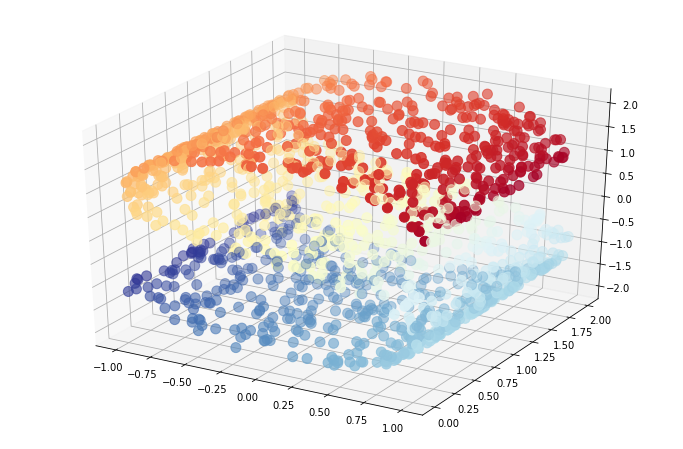

In [4]:
X, color = generate_s_curve(datasets.make_s_curve)

In [6]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    print("new shape of x:", X.shape)
    print('\nsample X: \n')
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize= (12,10))
    plt.axis("equal");
    
    plt.scatter(X[0], X[1], c= color, cmap= plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    
    return method

### MDS 

new shape of x: (1500, 2)

sample X: 

             0         1
169  -0.155606 -0.411014
784   0.214038  0.298729
136   0.380654  0.013080
709  -0.443554 -0.300772
118   0.401617  0.244260
146  -0.291102  0.199458
1314 -0.627618  0.287168
1157 -0.087890 -0.154744
1110  0.502935  0.048329
138   0.215739  0.257045


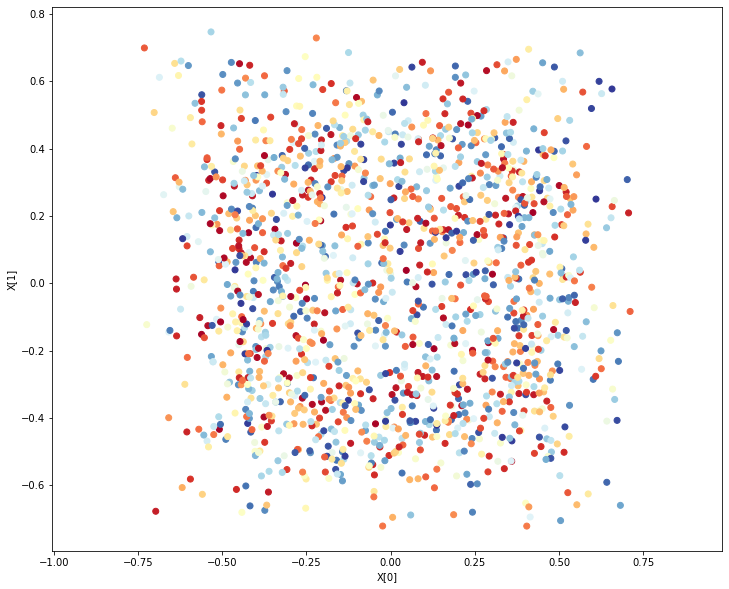

In [8]:
from sklearn.manifold import MDS

#non-parametric MDS
mds = apply_manifold_learning(X, MDS(n_components = 2, metric= False))

new shape of x: (1500, 2)

sample X: 

             0         1
1003  0.231339 -2.004437
172  -0.383994  1.976554
1338  0.073680  1.998604
1030 -0.051922 -2.028248
79   -0.018593 -2.074624
138  -0.572389  2.082508
310   0.625673  1.689844
1180  1.123026 -1.061759
1395 -0.734749  1.980891
1095 -0.334671 -2.139884


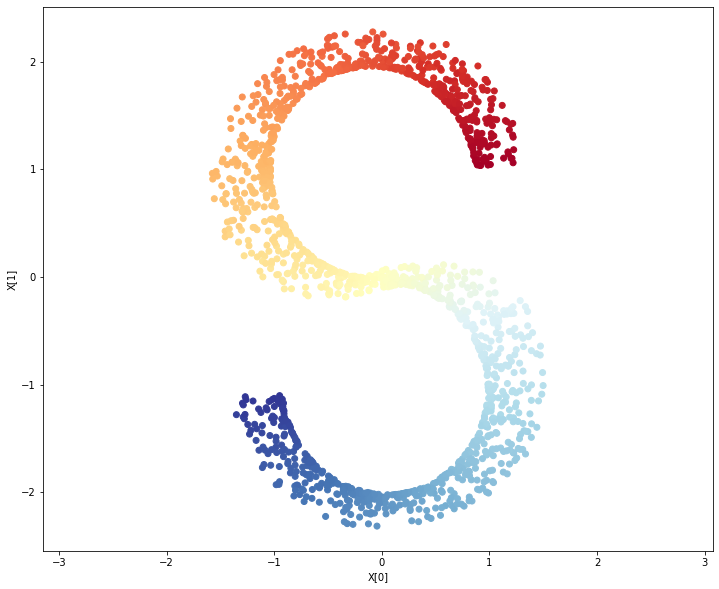

In [9]:
# parametric MDS
mds = apply_manifold_learning(X, MDS(n_components = 2, metric= True))

### Spectral Embedding

new shape of x: (1500, 2)

sample X: 

             0         1
1306  0.002649 -0.001445
1466  0.002570 -0.001199
30   -0.002786 -0.002636
1240 -0.002506 -0.001494
817   0.003001 -0.002672
754   0.003007 -0.002694
1164 -0.000037  0.003058
221   0.002460 -0.000838
773   0.001667  0.001296
79   -0.002660 -0.002094


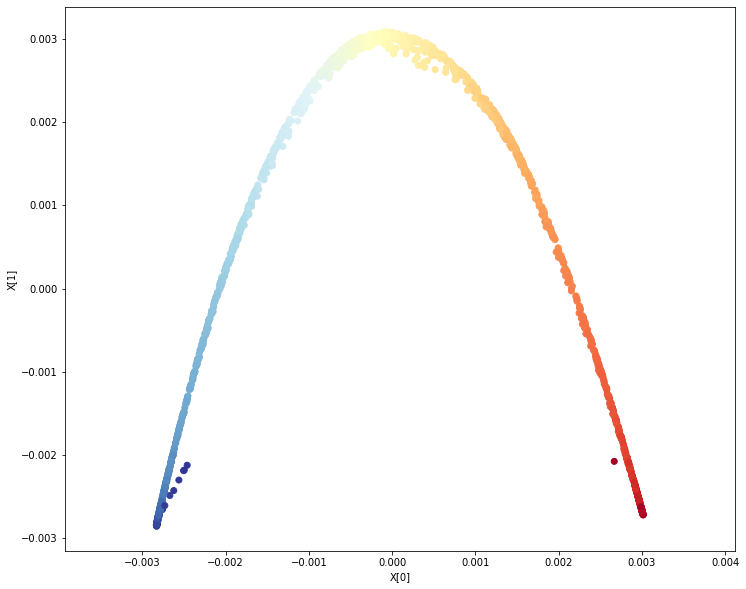

In [10]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X,
                                      SpectralEmbedding(n_components= 2, random_state= 0, eigen_solver= 'arpack'))

### TSNE

new shape of x: (1500, 2)

sample X: 

              0          1
1056 -60.892365   4.348480
776  -35.125637   8.922937
549  -16.548647   0.437601
1263  10.246926  11.623392
768   -1.503991  -4.332394
263    3.406137   4.263963
1439   4.885501  12.293453
590   56.037205  12.420459
1000  40.772743  14.472013
599   17.979277  -5.958081


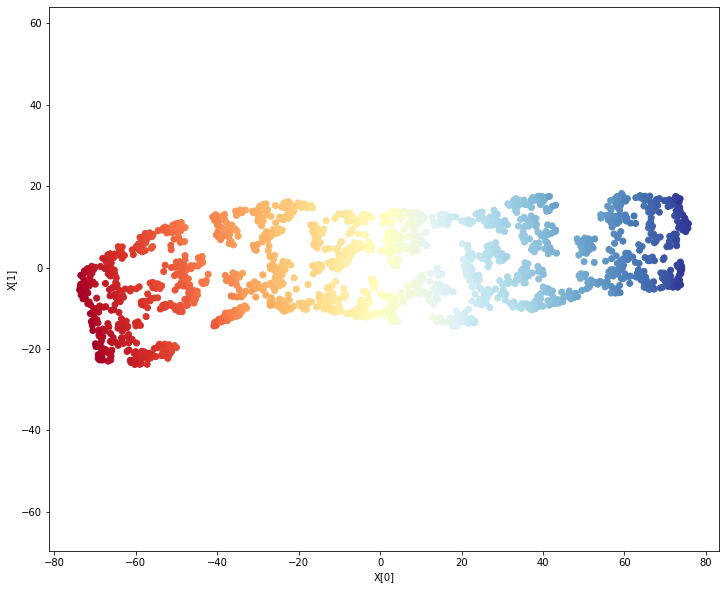

In [12]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2,
                                        init= 'pca',
                                        random_state = 0))

### Isomap

new shape of x: (1500, 2)

sample X: 

             0         1
1401 -4.043768  0.312637
1238 -2.790652  0.619644
67   -4.650845  0.560477
214   2.571647 -0.529201
284   0.785513 -0.795586
149  -1.437265  0.772304
156  -2.950222  0.056204
1173 -3.344091  0.119727
557   2.602104 -0.274266
1076  4.035227  0.581102


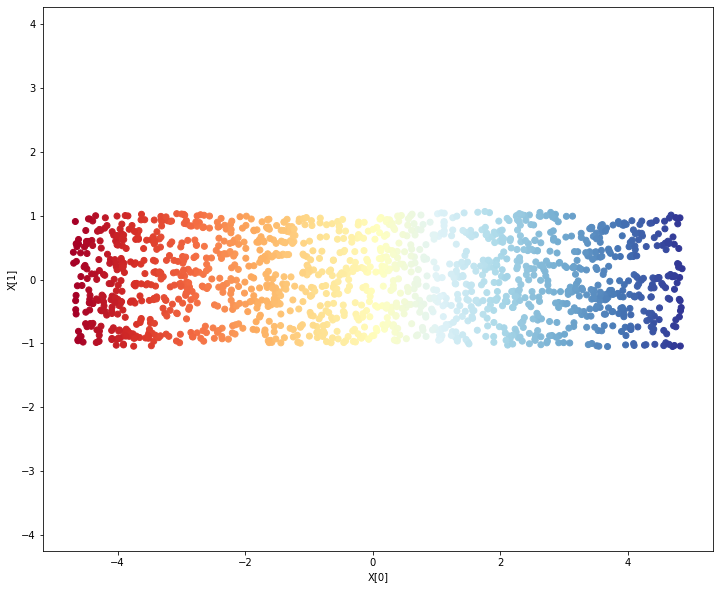

In [13]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components= 2))

### Locally Linear Embedding

new shape of x: (1500, 2)

sample X: 

             0         1
1270  0.018145 -0.017171
1125  0.036722  0.024685
463   0.032288  0.010665
845  -0.036769  0.033323
520   0.011488 -0.035225
765   0.032620  0.015772
1262  0.013372 -0.021897
335  -0.006291 -0.020617
972  -0.007102 -0.038948
575  -0.010555 -0.031080


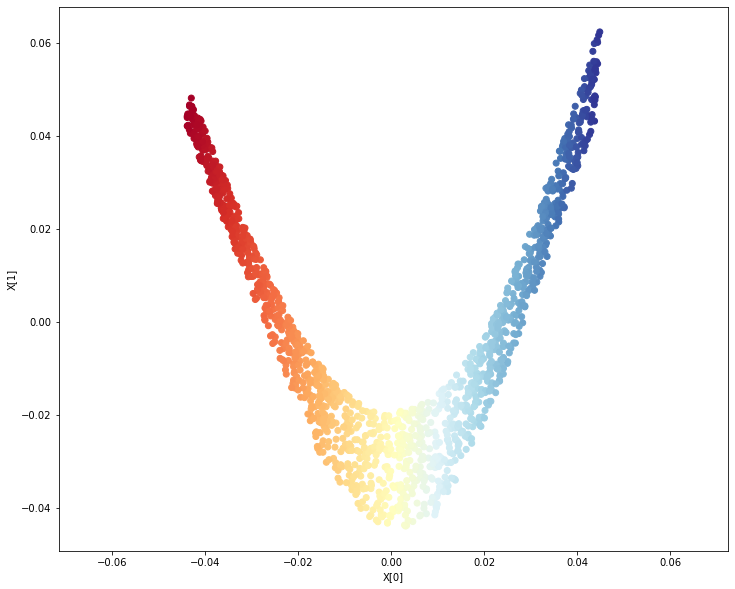

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X,
                              LocallyLinearEmbedding(n_neighbors = 15, n_components= 2, method= 'standard'))

new shape of x: (1500, 2)

sample X: 

             0         1
1144  0.027075  0.037650
166   0.021812  0.038530
1049  0.011452 -0.021381
483  -0.021779 -0.025882
751   0.002303  0.026654
897  -0.005593 -0.039636
0     0.037005  0.031197
172  -0.026382  0.022543
1397  0.031844  0.002644
271   0.032864 -0.027454


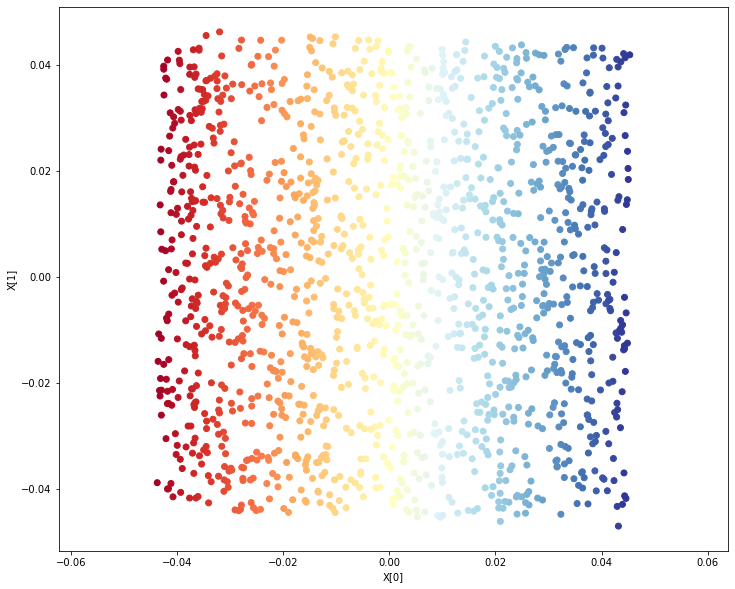

In [15]:
hle = apply_manifold_learning(X,
                              LocallyLinearEmbedding(n_neighbors = 15, n_components= 2, method= 'hessian'))